Notes:

Elliptic equations do not depend on time! (Steady state)

5 point stencil, has the point in the middle and the four cardinal directions from that point, only valid for interior points

no longer time dependent so instead of a time index its just an iterative index

when do we stop iterating?? if the solution converges! So we will use a while loop

Code:

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [5]:
#function that will return the analytical solution ITS A BLACKBOX!
def analytical_solution(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    u = (numpy.sinh(1.5 * numpy.pi * Y / Ly) *
         numpy.sin(1.5 * numpy.pi * X / Lx) / 
         numpy.sinh(1.5 * numpy.pi * Ly / Lx))
    return u

In [6]:
#Set Parameters
Lx, Ly = 1.0, 1.0
nx, ny = 41, 41

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

ua = analytical_solution(x, y, Lx, Ly)

In [7]:
def plot_3d(x, y, u):
    fig = pyplot.figure(figsize=(8.0,6.0))
    ax = mplot3d.Axes3D(fig)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.view_init(elev=30.0, azim=45.0)

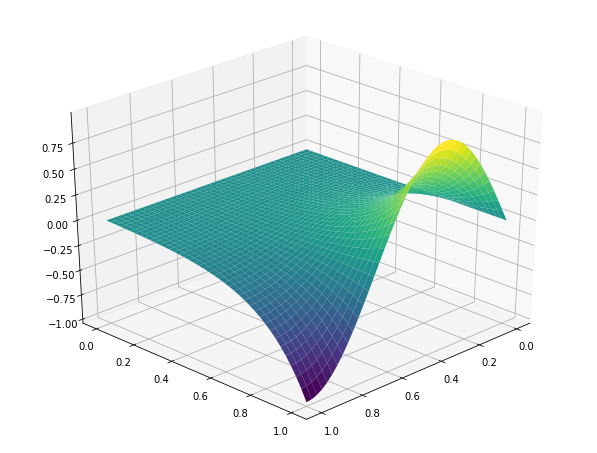

In [9]:
plot_3d(x, y, ua)
# gives a shape of a sin wave on the RHS

In [10]:
def relative_12_norm(u, u_ref):
    rdiff = (numpy.sqrt(numpy.sum((u - u_ref)**2)) / 
             numpy.sqrt(numpy.sum(u_ref**2)))
    return rdiff

In [11]:
def laplace2d_jacobi(u0, rtol=1e-6, maxiter=20000):
    u = u0.copy()
    ite = 0
    rdiff = rtol + 1.0
    while rdiff > rtol and ite < maxiter:
        un = u.copy()
        # only valid for interior points
        u[1:-1, 1:-1] = 0.25 * (u[:-2, 1:-1] + u[1:-1, :-2] + 
                                u[1:-1, 2:] + u[2:, 1:-1])
        u[1:-1, -1] = u[1:-1, -2]
        rdiff = relative_12_norm(u, un)
        ite += 1
    return u, ite, rdiff

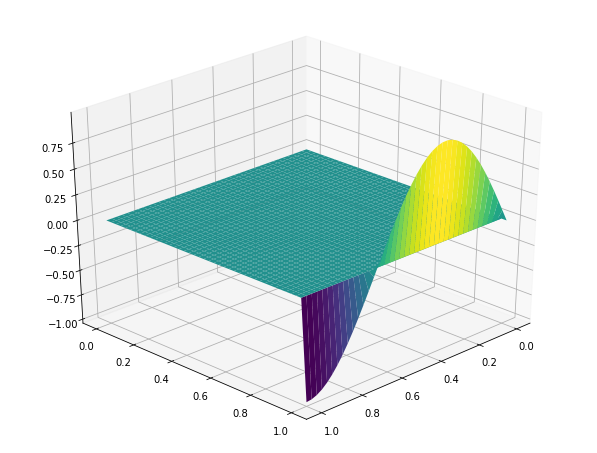

In [13]:
u0 = numpy.zeros((ny, nx))
u0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)
plot_3d(x, y, u0)

In [14]:
u, ites, rdiff = laplace2d_jacobi(u0, rtol=1e-8)

In [15]:
print(ites, rdiff)

4473 9.989253683884463e-09


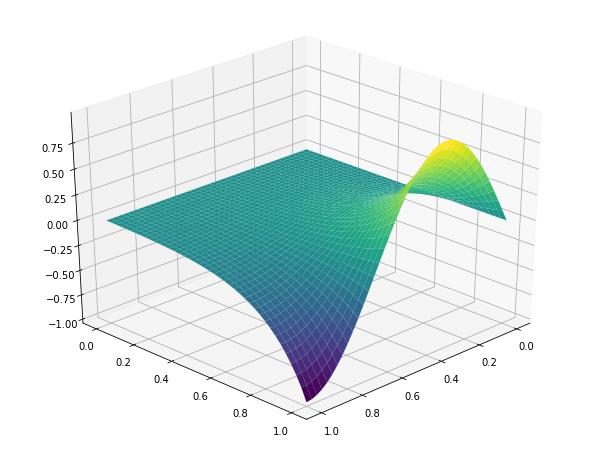

In [16]:
plot_3d(x, y, u)

In [17]:
nx_values = [11, 21, 41, 81]
errors = []

for nx in nx_values:
    print(nx)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = numpy.zeros((nx, nx))
    u0[-1: :] = numpy.sin(1.5 * numpy.pi *x / Lx)
    u = laplace2d_jacobi(u0, rtol=1e-8)[0] #asking for last componet of return in function
    ua = analytical_solution(x, y, Lx, Lx)
    error = relative_12_norm(u, ua)
    errors.append(error)

11
21
41
81


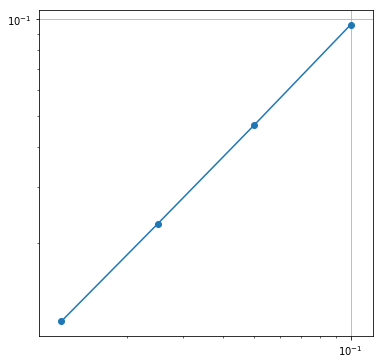

In [19]:
pyplot.figure(figsize=(6, 6))
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx / (nx - 1))
pyplot.loglog(dx_values, errors, marker='o')
pyplot.axis('equal');

In [20]:
def laplace2d_jacobi_neumann(u0, rtol=1e-6, maxiter=20000):
    u = u0.copy()
    ite = 0
    rdiff = rtol + 1.0
    while rdiff > rtol and ite < maxiter:
        un = u.copy()
        # only valid for interior points
        u[1:-1, 1:-1] = 0.25 * (u[:-2, 1:-1] + u[1:-1, :-2] + 
                                u[1:-1, 2:] + u[2:, 1:-1])
        #u[1:-1, -1] = u[1:-1, -2]
        u[1:-1, -1] = 0.25 * (u[:-2, -1] + 2 * u[1:-1, -2] + u[2:, -1]) #will make it a second order approx
        rdiff = relative_12_norm(u, un)
        ite += 1
    return u, ite, rdiff

In [23]:
nx_values = [11, 21, 41, 81]
errors = []

for nx in nx_values:
    #print(nx)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = numpy.zeros((nx, nx))
    u0[-1: :] = numpy.sin(1.5 * numpy.pi *x / Lx)
    u = laplace2d_jacobi_neumann(u0, rtol=1e-8)[0] #asking for last componet of return in function
    ua = analytical_solution(x, y, Lx, Lx)
    error = relative_12_norm(u, ua)
    errors.append(error)

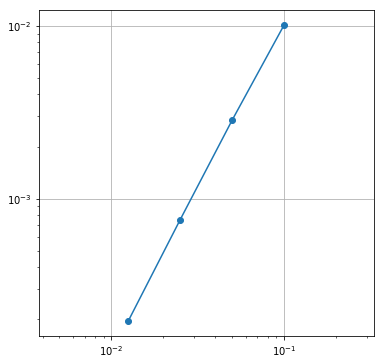

In [24]:
pyplot.figure(figsize=(6, 6))
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx / (nx - 1))
pyplot.loglog(dx_values, errors, marker='o')
pyplot.axis('equal');

Notes:

Now switching to the poisson equation!!

Just need to take into consideration the fuction on the RHS! (:

Code:

In [25]:
# Set Parameters
nx = 41
ny = 41
xmin, xmax = 0.0, 1.0
ymin, ymax = -0.5, 0.5
Lx = (xmax - xmin)
Ly = (ymax - ymin)
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

x = numpy.linspace(xmin, xmax, num=nx)
y = numpy.linspace(ymin, ymax, num=ny)

In [26]:
def poisson_source(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x,y)
    b = (-2.0 * numpy.pi / Lx * numpy.pi / Ly *
         numpy.sin(numpy.pi * X / Lx) * 
         numpy.cos(numpy.pi * Y / Ly))
    return b

In [27]:
from helper import l2_norm

In [47]:
def poisson(p0, b, dx, dy, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    conv = []  # convergence history
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, :-2] + pn[1:-1, 2:]) * dy**2 +
                          (pn[:-2, 1:-1] + pn[2:, 1:-1]) * dx**2 -
                          b[1:-1, 1:-1] * dx**2 * dy**2) /
                         (2.0 * (dx**2 + dy**2)))
        # Dirichlet boundary conditions at automatically enforced.
        # Compute and record the relative L2-norm of the difference.
        diff = l2_norm(p, pn)
        conv.append(diff)
        ite += 1
    return p, ite, conv

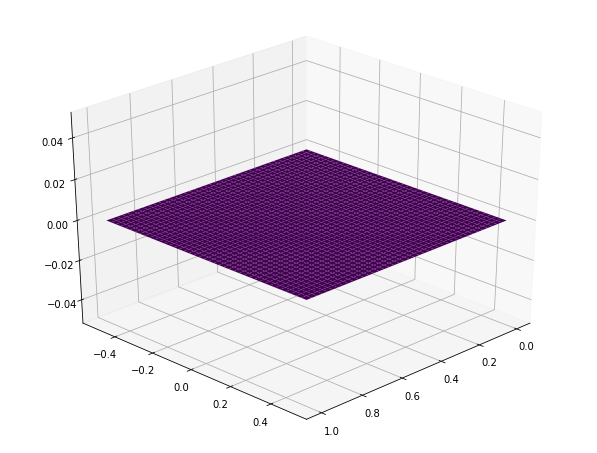

In [48]:
# Set the initial conditions.
p0 = numpy.zeros((ny, nx))

# Compute the source term.
b = poisson_source(x, y, Lx, Ly)

# Plot the initial scalar field.
plot_3d(x, y, p0)

In [50]:
p, ites, conv = poisson(p0, b, dx, dy, rtol=2e-7)

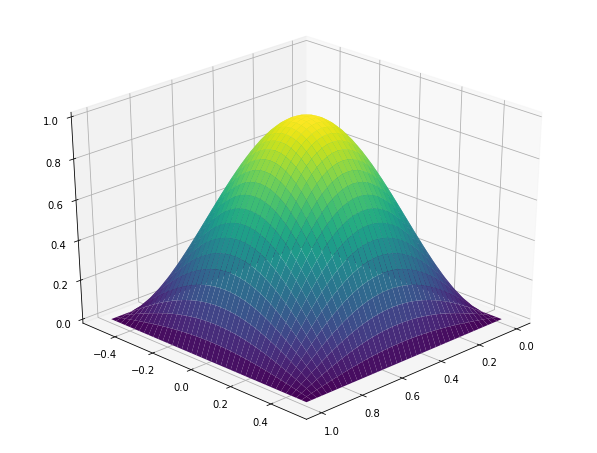

In [51]:
plot_3d(x, y, p)